In [ ]:
from google.colab import files#
files.upload()#

Saving mickiewicz.txt to mickiewicz (1).txt


{'mickiewicz.txt': b'Litwo! Ojczyzno moja! ty jeste\xc5\x9b jak zdrowie.\nIle ci\xc4\x99 trzeba ceni\xc4\x87, ten tylko si\xc4\x99 dowie,\nKto ci\xc4\x99 straci\xc5\x82. Dzi\xc5\x9b pi\xc4\x99kno\xc5\x9b\xc4\x87 tw\xc4\x85 w ca\xc5\x82ej ozdobie\nWidz\xc4\x99 i opisuj\xc4\x99, bo t\xc4\x99skni\xc4\x99 po tobie.\n \nPanno \xc5\x9awi\xc4\x99ta, co jasnej bronisz Cz\xc4\x99stochowy\nI w Ostrej \xc5\x9bwiecisz Bramie! Ty, co gr\xc3\xb3d zamkowy\nNowogr\xc3\xb3dzki ochraniasz z jego wiernym ludem!\nJak mnie dziecko do zdrowia powr\xc3\xb3ci\xc5\x82a\xc5\x9b cudem\n(Gdy od p\xc5\x82acz\xc4\x85cej matki pod Twoj\xc4\x85 opiek\xc4\x99\nOfiarowany, martw\xc4\x85 podnios\xc5\x82em powiek\xc4\x99\nI zaraz mog\xc5\x82em pieszo do Twych \xc5\x9bwi\xc4\x85ty\xc5\x84 progu\nI\xc5\x9b\xc4\x87 za wr\xc3\xb3cone \xc5\xbcycie podzi\xc4\x99kowa\xc4\x87 Bogu),\nTak nas powr\xc3\xb3cisz cudem na Ojczyzny \xc5\x82ono.\nTymczasem przeno\xc5\x9b moj\xc4\x99 dusz\xc4\x99 ut\xc4\x99sknion\xc4\x85\nDo tych pag\xc

AslusA rski
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])
tensor([[0.]], grad_fn=<LogSoftmaxBackward0>)
('mickiewicz', 0)
category = mickiewicz / line = Ze ja nudzi rzecz duga, choc najwymowniejsza.
category = mickiewicz / line = On mysli... Tu, w mgnieniu oka,
category = mickiewicz / line = Rumieni sie, serce mu bio nadzwyczajnie;
category = mickiewicz / line = Miaa nad umysami wielka moc ta tuszcza;
category = mickiewicz / line = Powiedz mi, piekna, luba dziewczyno,
category = mickiewicz / line = Litwy naowczas stolice.
category = mickiewicz / line = Trzeba byo rzed ruszyc lub awe przeskoczyc;
category = mickiewicz / line = Ciemna zasona powleka,
category = mickiewicz / line = agodnym rzecze wyrazem;
category = mickiewicz / line = Zawiescie krwa

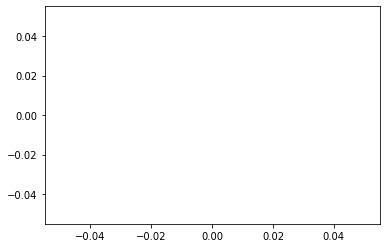

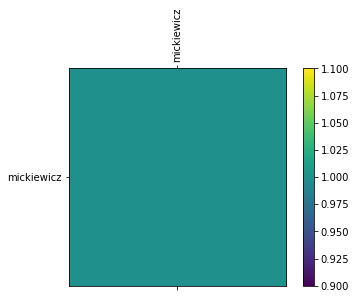

In [ ]:


from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import random

def findFiles(path): return glob.glob(path)


import unicodedata
import string
import math

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)


def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('ÅšlusÃ rski'))

# Utwórz słownik ciągów kategorii, listę nazw dla każdego języka
category_lines = {}
train_data = {}
test_data = {}
all_categories = []

#Czytanie pliku
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('mickiewicz.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    random.shuffle(lines)
    train_data[category] = lines[0:int(math.floor(0.8*len(lines)))]
    test_data[category] = lines[int(math.floor(0.8*len(lines)))+1:]
    category_lines[category] = lines

n_categories = len(all_categories)

"""Mamy teraz ``category_lines``, отображающий каждую категорию
(языка) в список строк (имен). Śledziliśmy również
``all_categories`` (tylko lista języków) i ``n_categories``
"""
"""Zamiana nazw na tensory
--------------------------
Teraz, gdy mamy już uporządkowane wszystkie nazwy, musimy je zmienić w
Tensory do ich wykorzystania.
Aby przedstawić jedną literę, używamy „gorącego wektora” o rozmiarze
``<1 x n_letters>``.  Горячий вектор заполняется нулями, за исключением единицы.
по индексу текущей буквы, например. ``"b" = <0 1 0 0 0 ...>``.

Aby stworzyć słowo, łączymy je w dwuwymiarową macierz.
``<line_length x 1 x n_letters>``.

Ten dodatkowy 1 wymiar wynika z faktu, że PyTorch zakłada, że ​​wszystko jest w partii - tutaj używamy tylko rozmiaru partii 1.
"""
import torch

# Znajdź na przykład indeks liter z all_letters. „a” = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Dla przykładu zamieniamy literę w tensor. <1 x n_letters>
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Konwertuj ciąg na <line_length x 1 x n_letters>,
# lub tablica wektorów gorących liter
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

"""Creating the Network
====================

This RNN module
"""

import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

"""Aby rozpocząć krok tej sieci, musimy przekazać dane wejściowe (w naszym przypadku
tensor dla bieżącej litery) i poprzedni stan ukryty (który my
zainicjuj najpierw zerami). Zwrócimy wynik (prawdopodobieństwo
każdego języka) i kolejny stan ukryty (który zachowujemy na następny)
krok).
"""

input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

"""W trosce o wydajność nie chcemy tworzyć nowego tensora dla
każdy krok, więc użyjemy lineToTensor zamiast
`` letterToTensor`` i użyj plasterków. Można to dodatkowo zoptymalizować za pomocą
wstępne obliczenia partii tensorowych.
"""

input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

"""Как видите, на выходе получается тензор ``<1 x n_categories>``, где
каждый элемент — это вероятность этой категории (чем выше, тем вероятнее).
Обучение
========
Подготовка к обучению
----------------------

Прежде чем перейти к обучению, делаем несколько вспомогательных функций. То
во-первых, это интерпретация выходных данных сети, которые, как мы знаем, являются
Вероятность каждой категории. Мы можем использовать ``Tensor.topk``, чтобы получить индекс
наибольшей ценности:
"""

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))



import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(train_data[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

"""Trenowanie sieci
--------------------

Teraz, aby trenowa tę sieć, wystarczy pokazać jej kilka przykładów,
niech robi przypuszczenia i mówi, czy się mylą.

Nn.NLLLoss jest odpowiedni dla funkcji straty, ponieważ ta ostatnia
Poziom RNN - nn.LogSoftmax.
"""

criterion = nn.NLLLoss()


"""Każdy cykl szkoleniowy będzie:

- Tworzenie tensorów wejściowych i docelowych
- Utwórz wyzerowany początkowy stan ukryty
- Przeczytaj każdą literę w i

     - Zapisz ukryty stan na następny list

- Porównaj wynik końcowy z celem
- Propagacja wsteczna
- Wyjście powrotne i strata
"""

learning_rate = 0.005 # Jeśli ustawisz to zbyt wysoko, może eksplodować. Jeśli jest zbyt niski, może się nie nauczyć

def train(category_tensor, line_tensor,output):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()



    return output, loss.item()



import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Śledzenie strat w celu zbudowania wykresu
current_loss = 0
all_losses = []
all_test_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

# Po prostu zwracamy dane wyjściowe podane w ciągu
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output


start = time.time()

for iter in range(1, 3):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor,output)
    current_loss += loss

    # drukowanie
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = 'âœ“' if guess == category else 'âœ— (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # dodawanie strat
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

    # Obliczanie strat na podstawie danych testowych
    if iter % plot_every == 0:
        test_loss = 0
        n_test_instances = 0
        for category in all_categories:
            category_tensor = Variable(torch.LongTensor([all_categories.index(category)]))
            n_test_instances = n_test_instances + len(test_data[category])
            for line in test_data[category]:
                line_tensor = Variable(lineToTensor(line))
                output = evaluate(line_tensor)
                test_loss = test_loss + criterion(output, category_tensor)
        all_test_losses.append(test_loss.item() / n_test_instances)



import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_test_losses)

"""Ocena wyników
=======================

Aby zobaczyć, jak dobrze sieć działa w różnych kategoriach, my
utworzyć macierz określającą dla każdego rzeczywistego języka (wiersze)
jaki język odgaduje sieć (kolumny). Aby obliczyć zamieszanie
w sieci przebiega macierz wielu próbek z
assessment(), który jest taki sam jak train(), z wyjątkiem właściwości przeciwnej.
"""

# Postępujemy zgodnie z poprawnym
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 3

# który jest poprawny
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# normalizacja
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# wykonanie
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)


ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)


ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))


plt.show()



def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(1, 1, True)
        predictions = []

        for i in range(1):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])



